In [254]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time

In [284]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [393]:
sales = pd.read_csv('/content/drive/MyDrive/DS560/Data/Clean_data/fake_data1.csv',parse_dates = ['Date'], index_col = ['Date'])

In [394]:
df = sales['Price']
df = df.to_frame()
df

,Price
Date,
2010-01-01,3.166982e+05
2010-02-01,2.832989e+05
2010-03-01,2.900000e+05
2010-04-01,2.897100e+05
2010-05-01,2.974100e+05
...,...
2021-08-01,1.255000e+06
2021-09-01,1.190000e+06
2021-10-01,1.136000e+06


In [379]:
#df['Price'] = np.log10(df['Price'])


In [395]:
df = df[288:432]
df

,Price
Date,
2010-01-01,193686.8156
2010-02-01,198128.5899
2010-03-01,201103.8740
2010-04-01,209530.0000
2010-05-01,213060.0000
...,...
2021-08-01,570000.0000
2021-09-01,570000.0000
2021-10-01,580000.0000


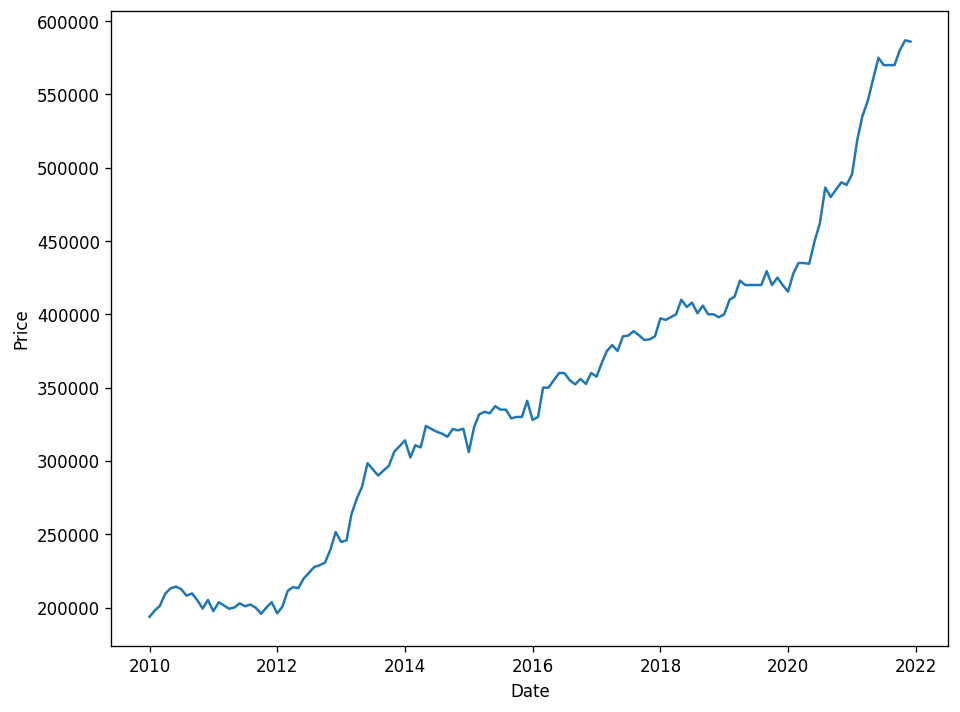

In [396]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df)

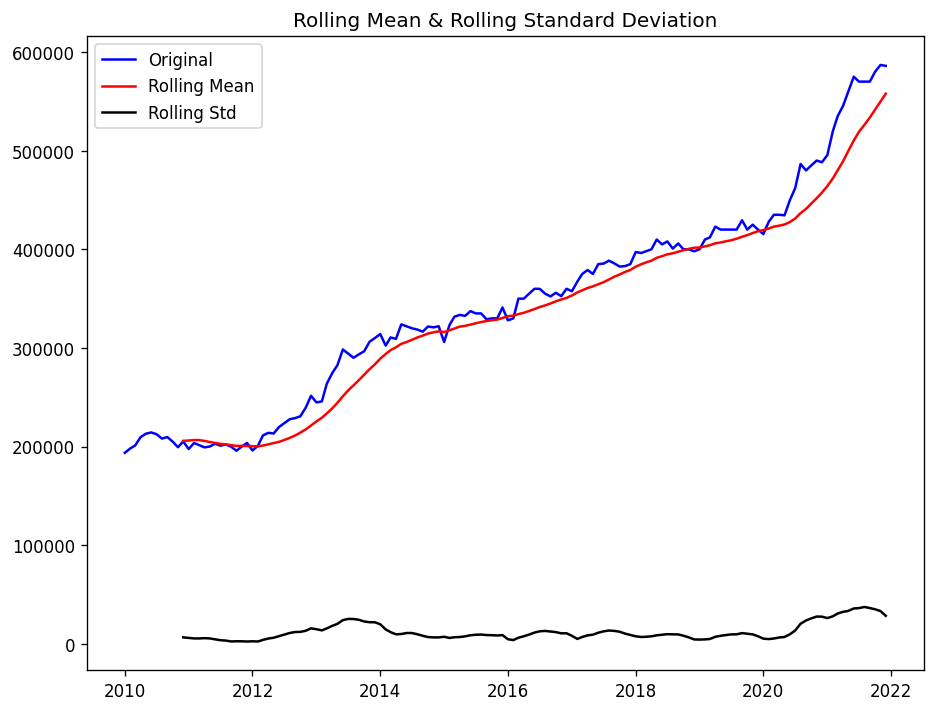

In [397]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [398]:
result = adfuller(df['Price'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


ADF Statistic: 1.7403879427190168
p-value: 0.9982231593625526
Critical Values:
	1%: -3.4769274060112707
	5%: -2.8819726324025625
	10%: -2.577665408088415


In [399]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Price'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

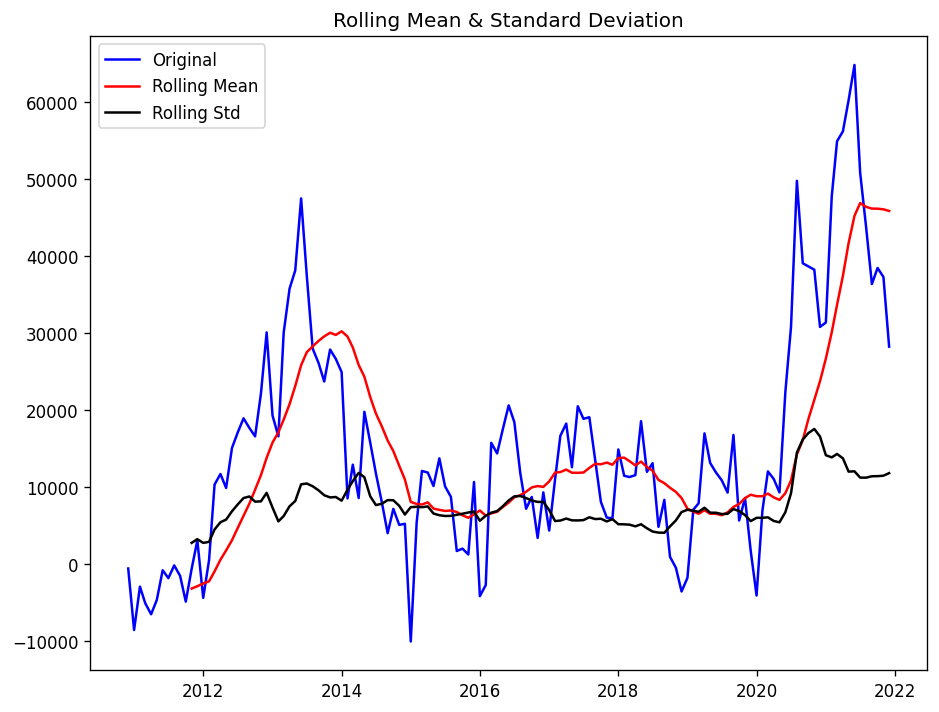

ADF Statistic: -2.5744348721548183
p-value: 0.09839700867006529
Critical Values:
	1%: -3.4808880719210005
	5%: -2.8836966192225284
	10%: -2.5785857598714417


In [400]:
rolling_mean = df.rolling(window=12).mean()
df_log_minus_mean = df - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

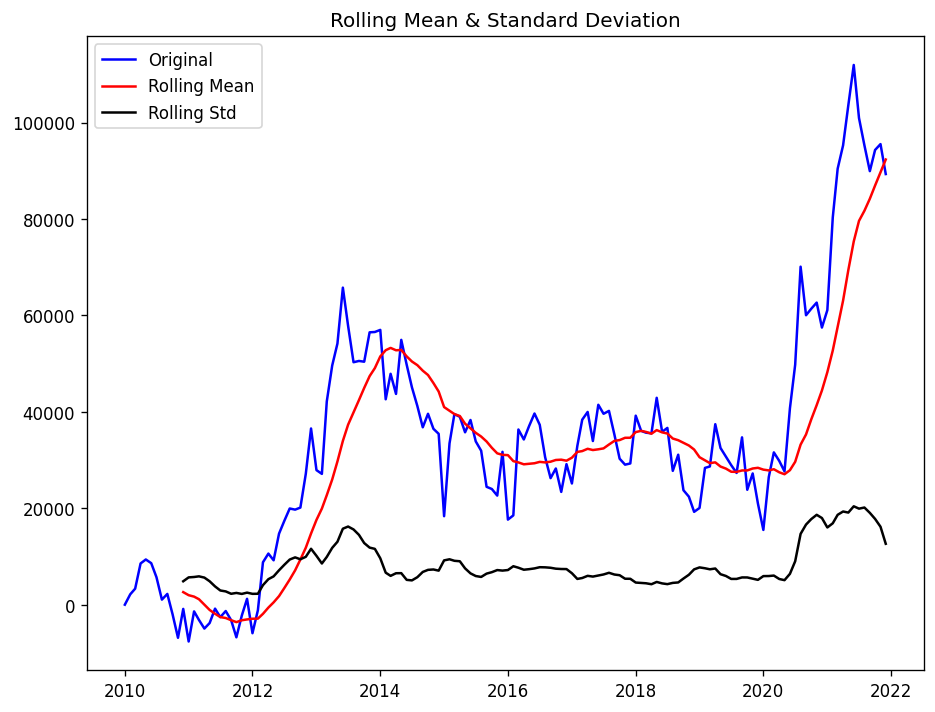

ADF Statistic: -1.0395859318443426
p-value: 0.7385539277533969
Critical Values:
	1%: -3.4769274060112707
	5%: -2.8819726324025625
	10%: -2.577665408088415


In [401]:
rolling_mean_exp_decay = df.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

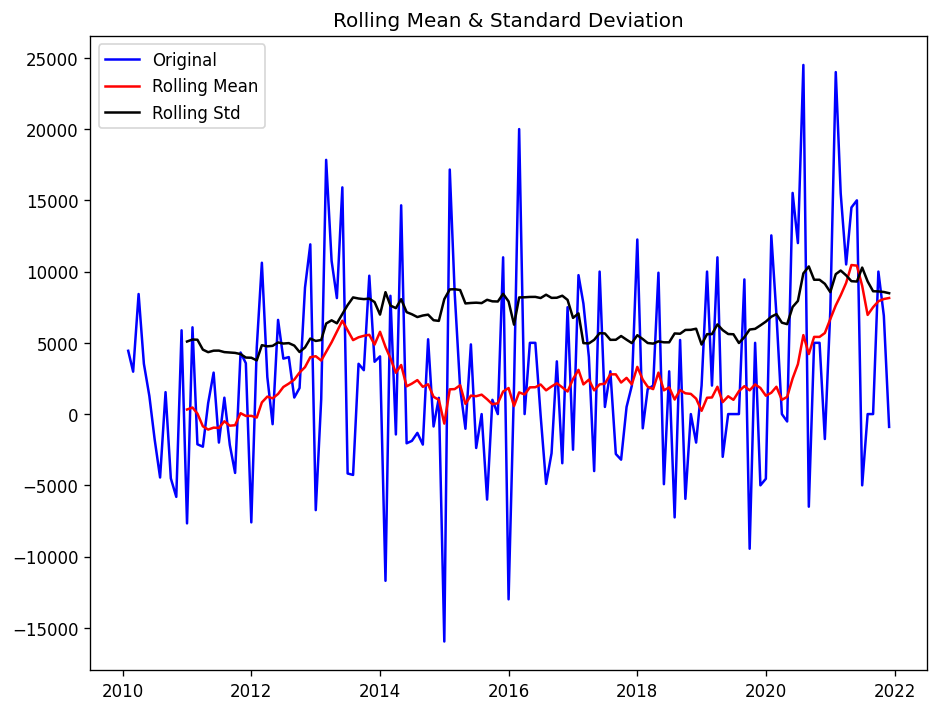

ADF Statistic: -11.693785335140626
p-value: 1.6290052239557838e-21
Critical Values:
	1%: -3.477261624048995
	5%: -2.8821181874544233
	10%: -2.5777431104939494


In [402]:
df_log_shift = df - df.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

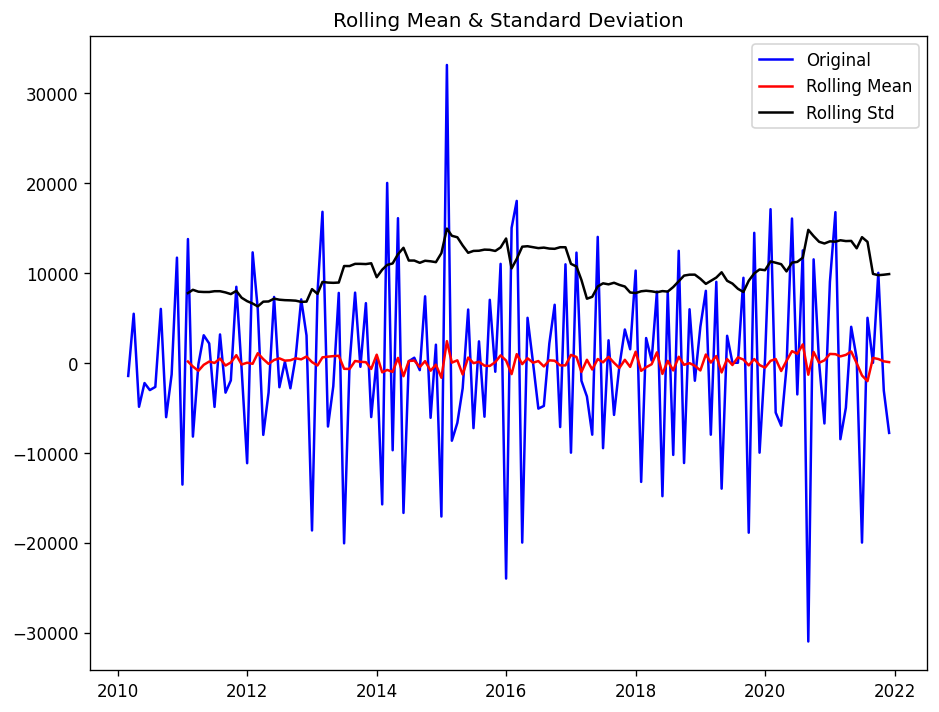

ADF Statistic: -7.350758262029972
p-value: 1.0074615584908888e-10
Critical Values:
	1%: -3.481281802271349
	5%: -2.883867891664528
	10%: -2.5786771965503177


In [408]:
df_log_shift1 = df_log_shift- df_log_shift.shift()
df_log_shift1.dropna(inplace=True)
get_stationarity(df_log_shift1)

In [403]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [410]:
df_log_shift1

,Price
Date,
2010-03-01,-1466.4902
2010-04-01,5450.8419
2010-05-01,-4896.1260
2010-06-01,-2255.4243
2010-07-01,-3038.7813
...,...
2021-08-01,5000.0000
2021-09-01,0.0000
2021-10-01,10000.0000


In [414]:
decomposition = seasonal_decompose(df) 
model = ARIMA(df, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


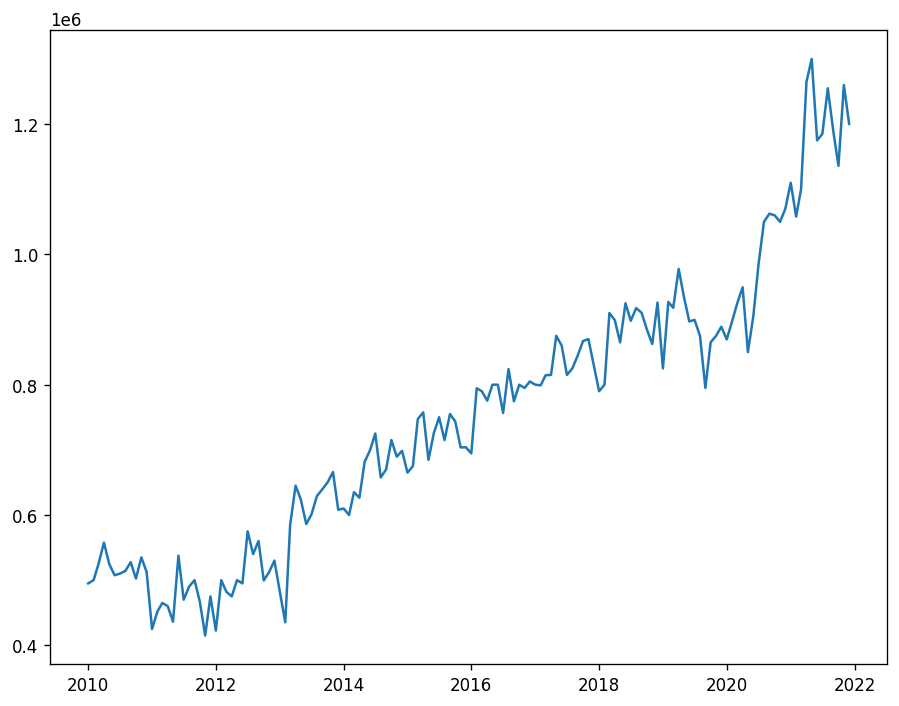

In [390]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df['Price'].iloc[0], index=df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

In [391]:
predictions_ARIMA_log


Date
2010-01-01    4.950000e+05
2010-02-01    4.999332e+05
2010-03-01    5.048502e+05
2010-04-01    5.034683e+05
2010-05-01    4.917651e+05
                  ...     
2021-08-01    1.151538e+06
2021-09-01    1.141116e+06
2021-10-01    1.153080e+06
2021-11-01    1.196769e+06
2021-12-01    1.187612e+06
Length: 144, dtype: float64

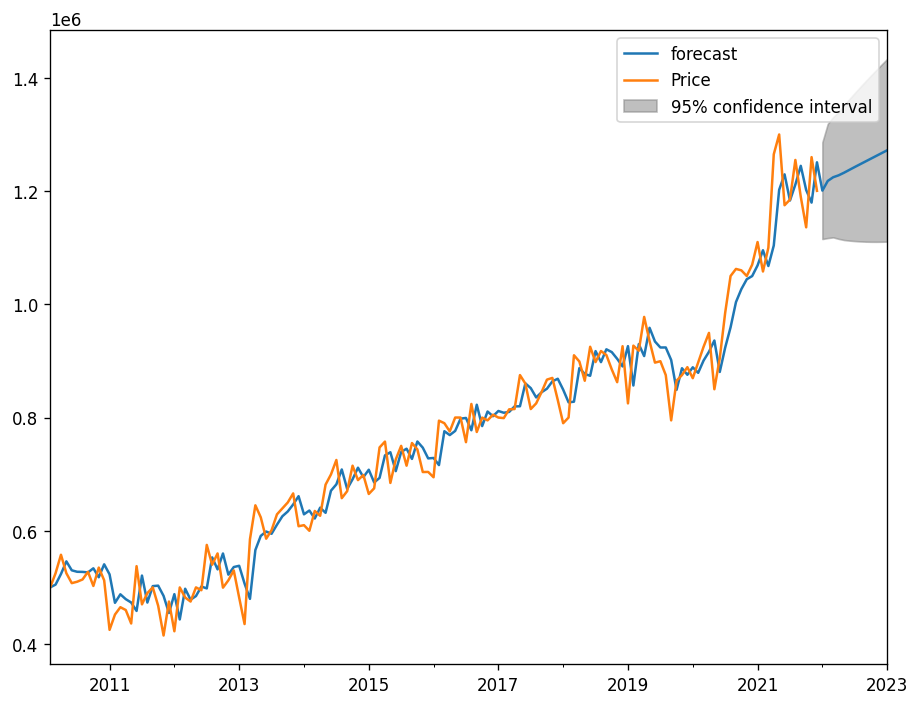

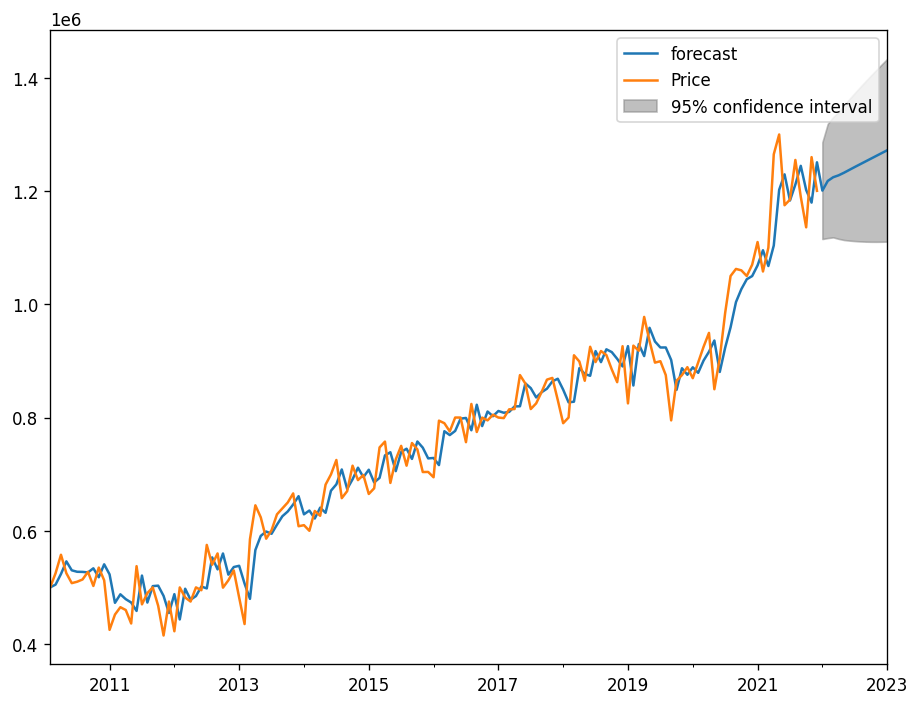

In [392]:
results.plot_predict(1,156)